# Zadanie 1

## Vzorkovacia frekvencia signálu:

In [1]:
import scipy.io.wavfile
#dvojrozmerne pole obsahujuce sample rate a samotne data
sample = scipy.io.wavfile.read("xpodle01.wav")
sample_rate = sample[0]
print(sample_rate)

16000


## Dĺžka signálu vo vzorkách a sekundách

In [2]:
#zisti sa mnozstvo dat v poli, co je vlastne dlzka signalu vo vzorkach
sample_count = len(sample[1])
print(sample_count)

16000


# Zadanie 2
## Spektrum signálu na základe Fourierovej transformácie

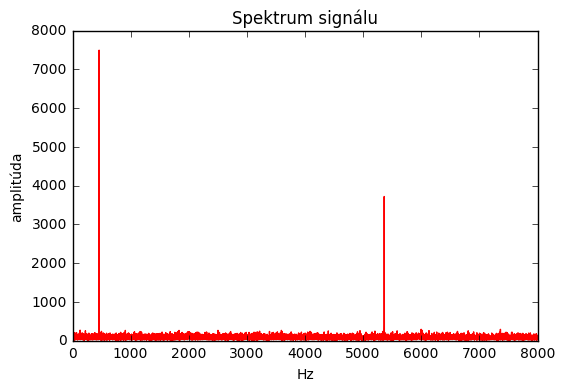

In [3]:
%matplotlib inline
import matplotlib.pyplot as plot
import numpy

#zdroj: http://nbviewer.jupyter.org/github/calebmadrigal/FourierTalkOSCON/blob/master/03_FourierTransform.ipynb
def setup_graph(title='', x_label='', y_label='', fig_size=None):
    fig = plot.figure()
    if fig_size != None:
        fig.set_size_inches(fig_size[0], fig_size[1])
    ax = fig.add_subplot(111)
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

#prevedie sa rychla fourierova transformacia, vypocita amplituda/magnituda, frekvencia a vykresli sa to
fft_output = numpy.fft.rfft(sample[1])
amplituda = [numpy.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frekvencie = [(i*1.0/sample_count)*sample_rate for i in range(sample_count//2+1)]

setup_graph(x_label='Hz', y_label='amplitúda', title='Spektrum signálu')
plot.plot(frekvencie, amplituda, "r");

# Zadanie 3
## Maximum modulu spektra

In [4]:
#zistim maximalnu hodnotu medzi magnitudami a priradim ju k frekvencii
print(frekvencie[numpy.argmax(amplituda)])

458.0


# Zadanie 4
## IIR Filter - nuly, póly, stabilita

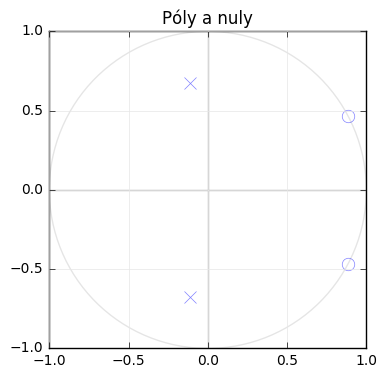

Is stable: Yes!


In [5]:
from scipy import signal
from matplotlib import patches
from matplotlib.pyplot import grid, axvline, axhline, subplot
import warnings
warnings.filterwarnings('ignore') #silence deprecation warning

b = [0.2324, -0.4112, 0.2324]
a = [1, 0.2289, 0.4662]

signal = sample[1]

#pouzijem funkciu tf2zpk na zistenie nul, polov
z,p,_ = scipy.signal.tf2zpk(b,a)

# Vykreslenie grafu
# zdroj: https://gist.github.com/endolith/4625838
plot.figure(figsize=(16, 9))
subplot(2, 2, 1)

ax = plot.subplot(2, 2, 1)
unit_circle = patches.Circle((0,0), radius=1, fill=False, color='black', ls='solid', alpha=0.1)

ax.add_patch(unit_circle)
axvline(0, color='0.7')
axhline(0, color='0.7')

poles = plot.plot(p.real, p.imag, 'x', markersize=9, alpha=0.5)
zeros = plot.plot(z.real, z.imag,  'o', markersize=9, color='none', alpha=0.5, markeredgecolor=poles[0].get_color())

r = 1.5 * numpy.amax(numpy.concatenate((abs(z), abs(p), [1])))

plot.axis([-r, r, -r, r])
plot.axis('scaled')

grid(True, color='0.9', linestyle='-', which='both', axis='both')
plot.title('Póly a nuly')
plot.show()


#overim podmienky stability
print("Is stable: ", end="")
if p == [] or  abs(p[0]) < 1:
    print("Yes!")
else:
    print("No")

# Zadanie 5
## IIR Filter - Frekvenčná charakteristika, typ

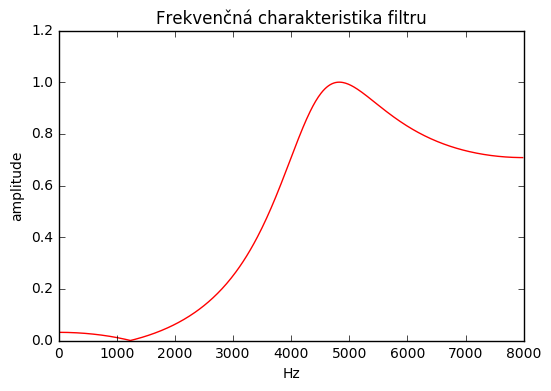

In [6]:
"""
Pouzijem funkciu freqz na vypocitanie frekvencnej charakteristiky

popis premennych:
    w - normalizovana frekvencia, pre ktorú bolo H vypocitane
    h - frekvencna odozva
"""
w,h = scipy.signal.freqz(b,a) 

plot.xlabel("Hz")
plot.ylabel("amplitude")
plot.title("Frekvenčná charakteristika filtru")

#Spravim konverziu x-ovej osy z rad/s na Hz
#pi/8000 - too lazy find how to divide pi by 8000 in numpy and constants are better for performance too
w = w/0.000392699081698724154807830422909937860524646174921888227 
plot.plot(w,abs(h), "r");

In [7]:
print("Typ: Horná priepusť")

Typ: Horná priepusť



# Zadanie 6
## Signal po aplikovaní IIR filtru - Spektrum signálu

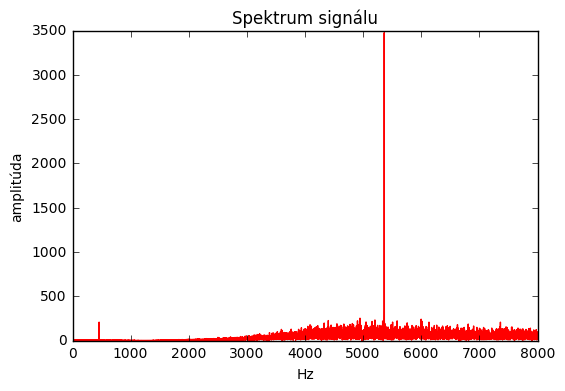

In [8]:
#funkcia lfilter aplikuje IIR filter na signal
filtered_signal = scipy.signal.lfilter(b, a, signal)

#rovnaky postup ako v zadani 2
#mozme pozorovat zmenu spektra signalu oproti originalnemu, ktore sa zhoduje s frekvencnou char. filtra vysie
fft_output = numpy.fft.rfft(filtered_signal)
magnituda = [numpy.sqrt(i.real**2 + i.imag**2)/len(fft_output) for i in fft_output]
frekvencie = [(i*1.0/len(filtered_signal))*len(filtered_signal) for i in range(len(filtered_signal)//2+1)]

setup_graph(x_label='Hz', y_label='amplitúda', title='Spektrum signálu')
plot.plot(frekvencie, magnituda, "r");

# Zadanie 7
## Určenie maxima modulu spektra filtrovaného signálu

In [9]:
#To iste co v zadani 3, ale pre signal po aplikovani filtra
print(frekvencie[numpy.argmax(magnituda)])

5363.0


# Zadanie 8
## Identifikovanie obdlznikovych signalov v signále


In [10]:
#ToDo

# Zadanie 9
## Výpočet autokorelačných koeficientov

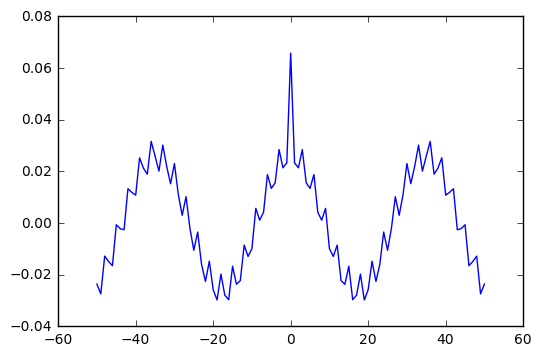

In [11]:
from spectrum import xcorr
signal = signal/32768

# (biased) autokorelacia pre vstupny signal
corr,_ = xcorr(signal, signal, norm='biased')

# x-ova osa - hodnoty leziace na intervale <-50;50> (k)
clock = numpy.arange(-50, 51, 1) 

# zistenie stredu
stred = int(len(corr)/2)

# vybratie 101 hodnot od stredu
plot.plot(clock, corr[stred-50:stred+51]);

# Zadanie 10
## Hodnota koeficientu R[10]

In [12]:
#zoberieme strednu hodnotu a posunieme sa o 10 do prava
print(corr[stred+10])

-0.00987793569017
